In [ ]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.config import settings

df = pd.read_csv(settings.RAW_DATA_PATH)
print(f"Data Loaded: {df.shape}")

Data Loaded: (284807, 31)


/var/folders/1p/ptfyjmsj0d3_tnlyyp_rwdsm0000gn/T/ipykernel_88505/204883171.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df["Class"], sort=True)


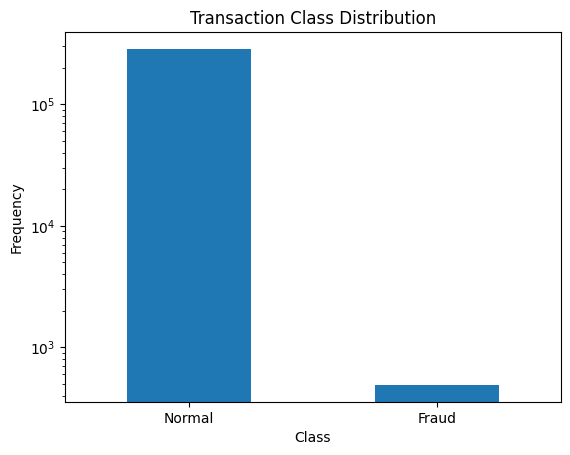

Fraud Ratio: 0.00173


In [4]:

count_classes = pd.value_counts(df["Class"], sort=True)
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()

print(f"Fraud Ratio: {df['Class'].value_counts()[1] / len(df):.5f}")

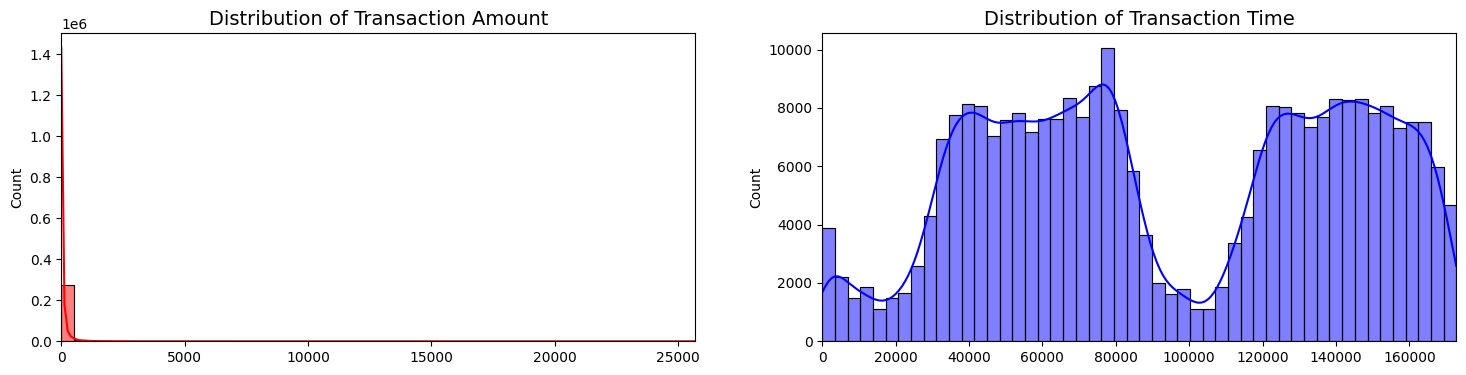

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))


amount_val = df["Amount"].values
sns.histplot(amount_val, ax=ax[0], color="r", kde=True, bins=50)
ax[0].set_title("Distribution of Transaction Amount", fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

time_val = df["Time"].values
sns.histplot(time_val, ax=ax[1], color="b", kde=True, bins=50)
ax[1].set_title("Distribution of Transaction Time", fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

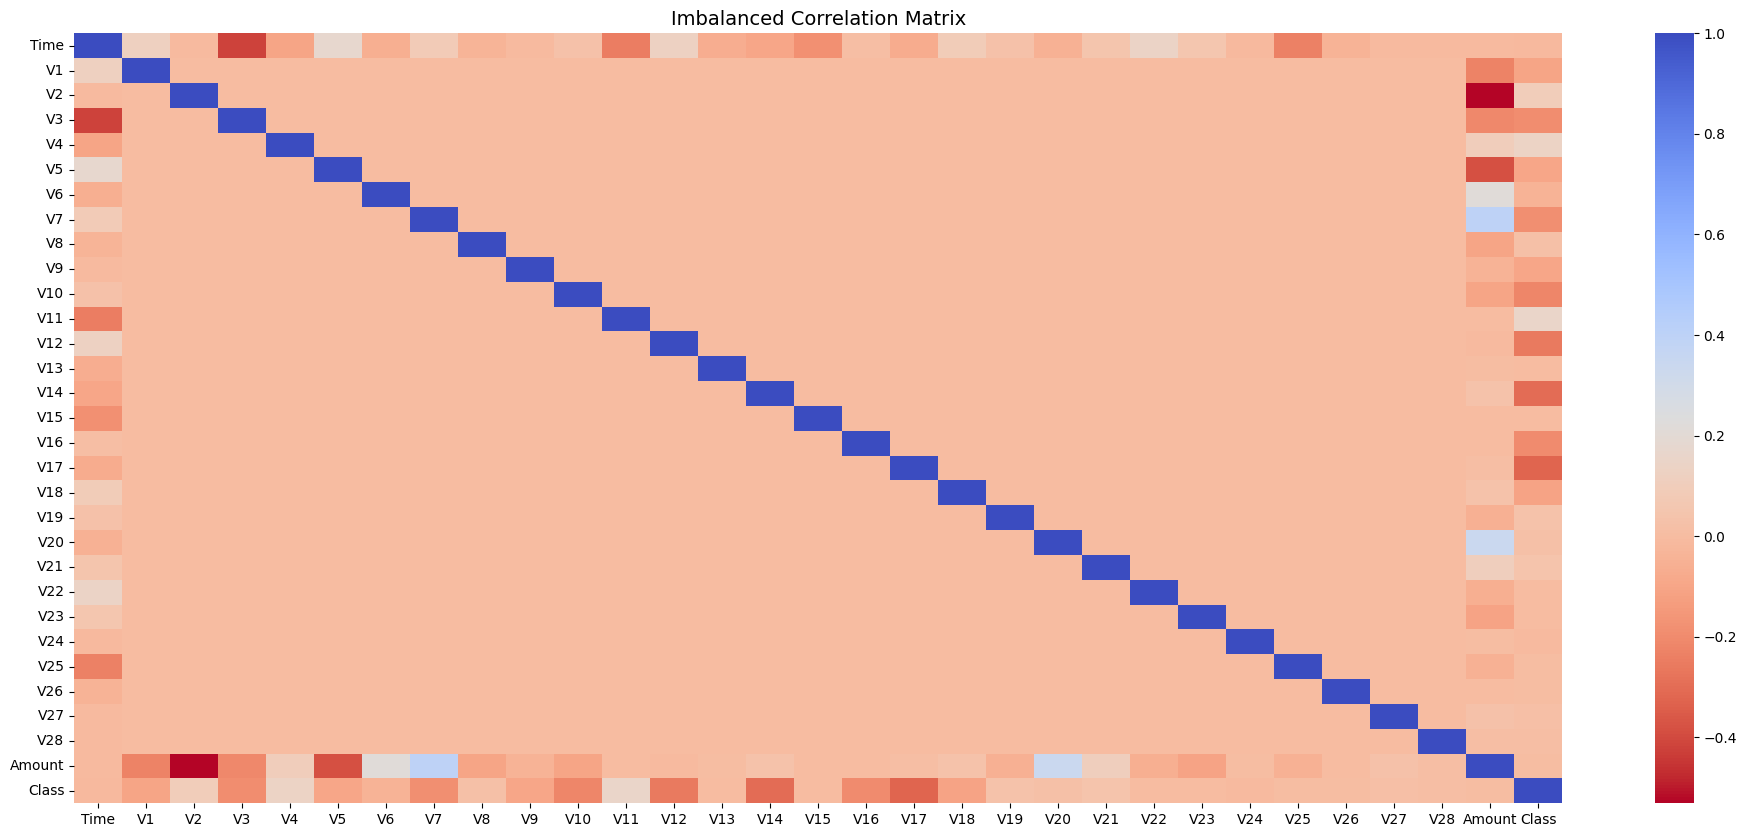

In [7]:
# We take a small sample to plot the heatmap clearly, otherwise it's too dense
# NOTE: This is correlation on imbalanced data, so take it with a grain of salt
f, ax = plt.subplots(figsize=(24, 10))

corr = df.corr()
sns.heatmap(corr, cmap="coolwarm_r", annot_kws={"size": 20}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()